In [52]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import pandas as pd

In [54]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [56]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [58]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [60]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [61]:
Base.metadata.tables


immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

# Exploratory Climate Analysis

In [62]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

start_date ='2016-11-10'
end_date = '2016-11-18'
query_date = dt.date(2016,11,10) - dt.timedelta(days=365)
last12months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).filter(Measurement.date <= start_date).all()
last12months



[('2015-11-11', 0.0),
 ('2015-11-12', 0.01),
 ('2015-11-13', 0.0),
 ('2015-11-14', 0.17),
 ('2015-11-15', 0.02),
 ('2015-11-16', 0.0),
 ('2015-11-17', 0.0),
 ('2015-11-18', 0.02),
 ('2015-11-19', 0.0),
 ('2015-11-20', 1.57),
 ('2015-11-21', 0.85),
 ('2015-11-22', 0.33),
 ('2015-11-23', 0.62),
 ('2015-11-24', 0.75),
 ('2015-11-25', 0.01),
 ('2015-11-26', 0.36),
 ('2015-11-27', 0.11),
 ('2015-11-28', 0.02),
 ('2015-11-29', 0.03),
 ('2015-11-30', 0.01),
 ('2015-12-01', 0.0),
 ('2015-12-02', 0.0),
 ('2015-12-03', 0.06),
 ('2015-12-04', 0.02),
 ('2015-12-05', 0.0),
 ('2015-12-06', 0.0),
 ('2015-12-07', 0.0),
 ('2015-12-08', 0.0),
 ('2015-12-09', 0.0),
 ('2015-12-10', 0.06),
 ('2015-12-11', 0.0),
 ('2015-12-12', 0.39),
 ('2015-12-13', 0.0),
 ('2015-12-14', 0.0),
 ('2015-12-15', 0.08),
 ('2015-12-16', 0.0),
 ('2015-12-17', 0.02),
 ('2015-12-18', 0.08),
 ('2015-12-19', 0.13),
 ('2015-12-20', 0.03),
 ('2015-12-21', 0.01),
 ('2015-12-22', 0.0),
 ('2015-12-23', 0.0),
 ('2015-12-24', 0.0),
 ('2015

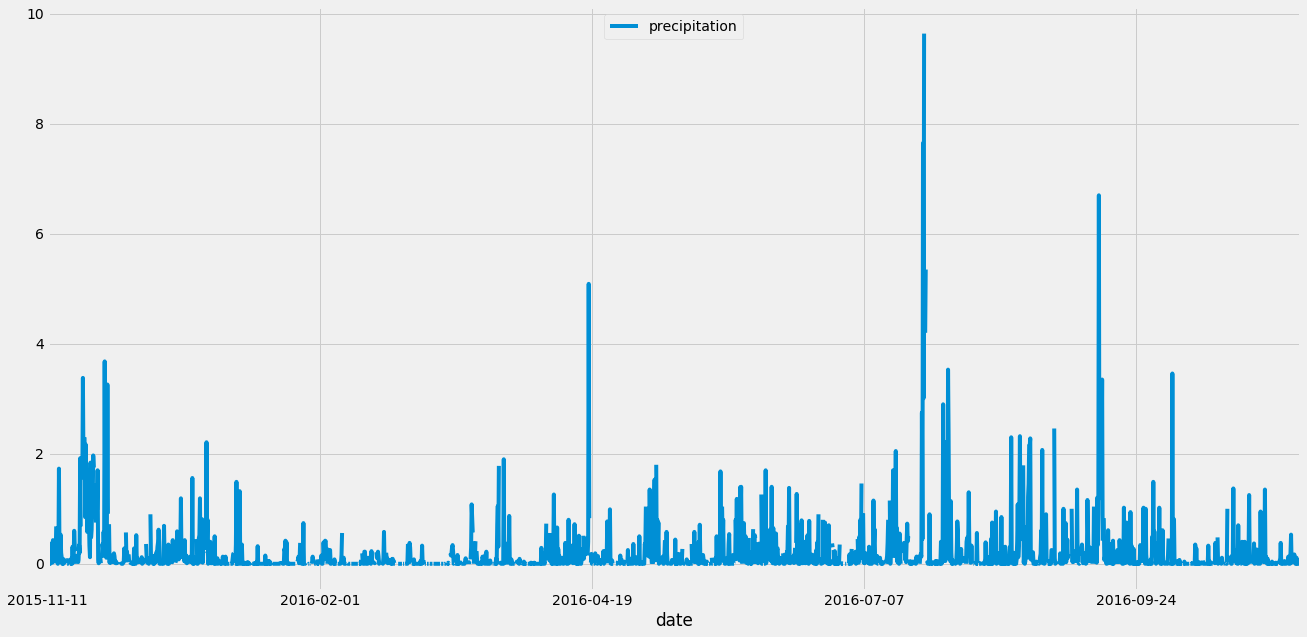

In [63]:
query_result = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).\
                            filter(Measurement.date <= start_date).all(), columns =['date','precipitation'])
query_result.set_index("date", inplace = True)
query_result = query_result.sort_values(by =['date'])

query_result.plot(figsize =(20, 10))
plt.legend(loc = "upper center")



In [64]:
# Use Pandas to calcualte the summary statistics for the precipitation data
query_result.describe()

,precipitation
count,2058.000000
mean,0.197736
std,0.532547
min,0.000000
25%,0.000000
50%,0.030000
75%,0.160000
max,9.640000


In [65]:
# Design a query to show how many stations are available in this dataset?
total_station = session.query(func.count(Station.station)).all()
total_station

[(9)]

In [66]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
              order_by(desc(func.count(Measurement.station))).all()
most_active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_recorded = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

print(temp_recorded)


[(54.0, 85.0, 71.66378066378067)]


Text(0.5, 0, 'Temperature')

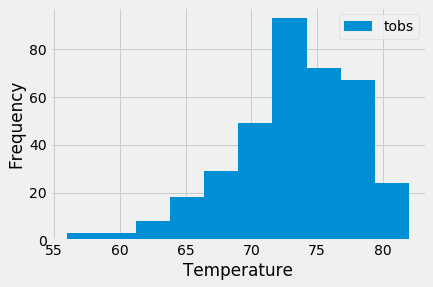

In [68]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observation = session.query(Measurement.tobs).filter(Measurement.date >= query_date).filter(Measurement.date <= start_date).filter(Measurement.station =="USC00519281").all()
observation_df = pd.DataFrame(observation, columns =["tobs"])
observation_df.plot.hist(by ='Temp_data')
plt.xlabel("Temperature")

In [69]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [70]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

previous_startdate = dt.date(2016,11,10) - dt.timedelta(days=365)
previous_enddate = dt.date(2016,11,18)-dt.timedelta(days=365)
previous_startdate = previous_startdate.strftime("%Y-%m-%d")
previous_enddate = previous_enddate.strftime("%Y-%m-%d")
results =calc_temps(previous_startdate,previous_enddate)
print(results)




[(66.0, 75.35, 81.0)]


Text(0.5, 1.0, 'Trip AVg Temp')

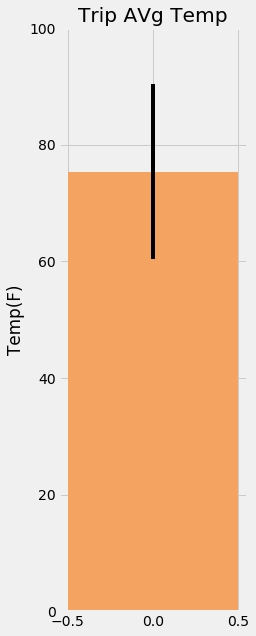

In [71]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmin=results[0][0]
tavg=results[0][1]
tmax=results[0][2]
yerr=tmax-tmin
plt.figure(figsize=(3, 10))
plt.bar(0,tavg,width = 1,yerr=yerr,align="center",color = "sandybrown")
plt.ylim(0,100)
plt.ylabel("Temp(F)")
plt.title("Trip AVg Temp")

In [72]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevationsel


sel =[Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)]
rainfalWeatherstation = session.query(*sel).\
                       filter(Measurement.station == Station.station).filter(Measurement.date >=previous_startdate).\
                       filter(Measurement.date <= previous_enddate).group_by(Measurement.station).order_by(desc(func.sum(Measurement.prcp))).all()
print(rainfalWeatherstation)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 4.2), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 1.46), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.3900000000000001), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.74), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.55), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.22), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, None)]


## Optional Challenge Assignment

In [73]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [74]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
monthDate =[]
date =[]
dates =[]
query_date = [dt.date(2016, 11, 10) + dt.timedelta(days=x) for x in range(9)]
for i in query_date:
    monthDate.append(i.strftime("%m-%d"))
for i in monthDate:
    date.append(*daily_normals(i))
date


[(63.0, 72.47916666666667, 79.0),
 (67.0, 74.3913043478261, 80.0),
 (62.0, 72.78, 80.0),
 (61.0, 72.48979591836735, 79.0),
 (68.0, 74.33333333333333, 80.0),
 (65.0, 73.67924528301887, 79.0),
 (63.0, 73.50980392156863, 79.0),
 (64.0, 72.6923076923077, 79.0),
 (66.0, 73.55319148936171, 81.0)]

In [75]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
date_df = pd.DataFrame(date, columns=["tmin", "tmax", "tavg"])
date_df["date"] = query_date
date_df.set_index("date", inplace = True)
date_df

,tmin,tmax,tavg
date,,,
2016-11-10,63.0,72.479167,79.0
2016-11-11,67.0,74.391304,80.0
2016-11-12,62.0,72.780000,80.0
2016-11-13,61.0,72.489796,79.0
2016-11-14,68.0,74.333333,80.0
2016-11-15,65.0,73.679245,79.0
2016-11-16,63.0,73.509804,79.0
2016-11-17,64.0,72.692308,79.0
2016-11-18,66.0,73.553191,81.0


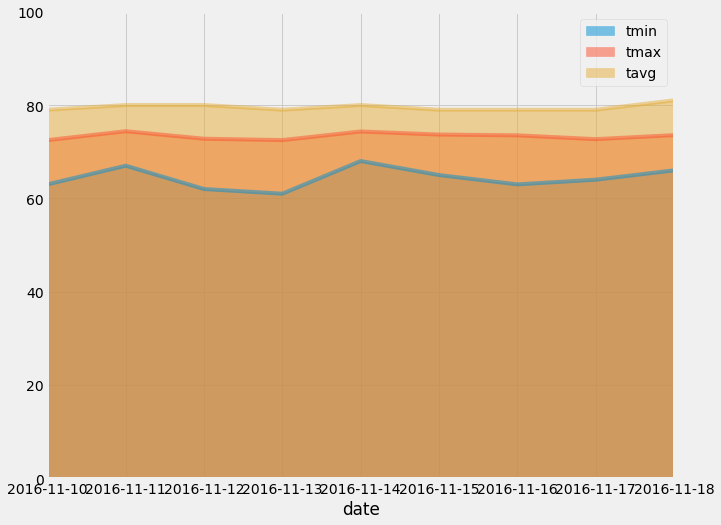

In [76]:
# Plot the daily normals as an area plot with `stacked=False`

date_df.plot.area(stacked = False, figsize=(10,8), ylim=(0,100))

#Temperature analysis 1



In [132]:
avgJunetemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.date.like("_____06%")).all()
avgJunetemp


[(74.94411764705882)]

In [133]:
avgDectemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.date.like("_____12%")).all()
avgDectemp

[(71.04152933421226)]